<a href="https://colab.research.google.com/github/abd-RAHEEM/PySpector/blob/main/Pyspector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# To handle .arff files (if you download the original file)
# You might need to install this: pip install liac-arff
# import arff

# Set some visualization styles
sns.set(style="whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("radowanulhaque/software-defect")

print("Path to dataset files:", path)

100%|██████████| 308k/308k [00:00<00:00, 54.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/radowanulhaque/software-defect/versions/1


In [6]:
import pandas as pd
import os # A standard Python library for interacting with the operating system, like handling file paths

# This code assumes you have already run the kagglehub download cell
# and the 'path' variable contains the path to the downloaded folder.

# We will now construct the full path to the specific file we want: 'cm1.csv'
file_path = os.path.join(path, 'cm1.csv')

print(f"Constructed full path to the file: {file_path}")

# Now, load the dataset using this complete file path
try:
    data = pd.read_csv(file_path)
    print("\nDataset 'cm1.csv' loaded successfully using the kagglehub path!")
    print("\nHere are the first 5 rows:")
    print(data.head())
except FileNotFoundError:
    print(f"\nError: Could not find 'cm1.csv' at the path.")
    print("Let's check the actual contents of the downloaded folder:")
    # This will list all files in the directory to help debug
    print(os.listdir(path))

Constructed full path to the file: /root/.cache/kagglehub/datasets/radowanulhaque/software-defect/versions/1/cm1.csv

Dataset 'cm1.csv' loaded successfully using the kagglehub path!

Here are the first 5 rows:
   id   loc  v(g)  ev(g)  iv(g)     n       v     l      d      i  ...  \
0   1   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30  ...   
1   2   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00  ...   
2   3  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  ...   
3   4  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  ...   
4   5  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0       2          2        2                  2      1.2        1.2   
1       1          1        1                  1      1.0        1.0   
2       1          0        6                  0     15.0       15.0   
3       0          0        3                  0     16.0

First 5 rows of the dataset:
   id   loc  v(g)  ev(g)  iv(g)     n       v     l      d      i  ...  \
0   1   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30  ...   
1   2   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00  ...   
2   3  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  ...   
3   4  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  ...   
4   5  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0       2          2        2                  2      1.2        1.2   
1       1          1        1                  1      1.0        1.0   
2       1          0        6                  0     15.0       15.0   
3       0          0        3                  0     16.0        8.0   
4       0          0        3                  0     16.0       12.0   

   total_Op  total_Opnd  branchCount  defects  
0       1.2         1.2          1.4    False

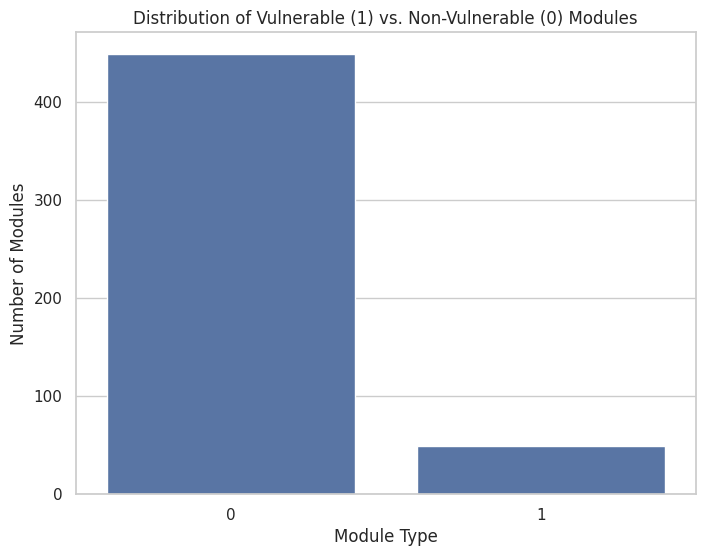


EDA Conclusion: The dataset is highly imbalanced. Non-vulnerable modules vastly outnumber vulnerable ones.
This is a critical insight that will influence how we build and evaluate our model.


In [7]:
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Get a summary of the dataset, including data types and non-null values
print("\nDataset Information:")
data.info()

# Get descriptive statistics for all numerical columns
print("\nDescriptive Statistics:")
print(data.describe())

# The target variable is 'defects'. Let's rename it to something clearer and convert boolean to integer (0 or 1)
if 'defects' in data.columns:
    data.rename(columns={'defects': 'is_vulnerable'}, inplace=True)
    # Convert boolean (True/False) to integer (1/0)
    data['is_vulnerable'] = data['is_vulnerable'].astype(int)
    print("\n'defects' column renamed to 'is_vulnerable' and converted to integer.")
else:
    print("\nWarning: 'defects' column not found. Please check the column name for the target variable.")

# **CRUCIAL STEP**: Check the distribution of our target variable
print("\nDistribution of Vulnerable vs. Non-Vulnerable Modules:")
vulnerability_counts = data['is_vulnerable'].value_counts()
print(vulnerability_counts)

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='is_vulnerable', data=data)
plt.title('Distribution of Vulnerable (1) vs. Non-Vulnerable (0) Modules')
plt.ylabel('Number of Modules')
plt.xlabel('Module Type')
plt.show()

print("\nEDA Conclusion: The dataset is highly imbalanced. Non-vulnerable modules vastly outnumber vulnerable ones.")
print("This is a critical insight that will influence how we build and evaluate our model.")

In [8]:
# Define our features (X) and target (y)
X = data.drop('is_vulnerable', axis=1) # All columns except our target
y = data['is_vulnerable']             # Only the target column

# Split the data into training (80%) and testing (20%) sets
# 'random_state=42' ensures that we get the same split every time we run the code, for reproducibility.
# 'stratify=y' is important for imbalanced datasets. It ensures the train and test sets have a similar proportion of vulnerable modules.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"\nProportion of vulnerable modules in training set:\n{y_train.value_counts(normalize=True)}")
print(f"\nProportion of vulnerable modules in testing set:\n{y_test.value_counts(normalize=True)}")


# Feature Scaling
# Although Random Forest is less sensitive to feature scaling, it's good practice.
# It ensures that features with large values (like lines of code) don't dominate features with small values.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData has been split and features have been scaled.")

Training set shape: (398, 22)
Testing set shape: (100, 22)

Proportion of vulnerable modules in training set:
is_vulnerable
0    0.90201
1    0.09799
Name: proportion, dtype: float64

Proportion of vulnerable modules in testing set:
is_vulnerable
0    0.9
1    0.1
Name: proportion, dtype: float64

Data has been split and features have been scaled.


In [9]:
# Create the Random Forest Classifier model
# n_estimators=100 means it will build 100 decision trees.
# class_weight='balanced' helps with the imbalanced dataset.
# random_state=42 ensures the model's randomness is the same each time.
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model using our training data
print("Training the Random Forest model...")
model.fit(X_train, y_train)
print("Model training complete!")

Training the Random Forest model...
Model training complete!



Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.60      0.75        10

    accuracy                           0.96       100
   macro avg       0.98      0.80      0.86       100
weighted avg       0.96      0.96      0.96       100


Confusion Matrix:
[[90  0]
 [ 4  6]]


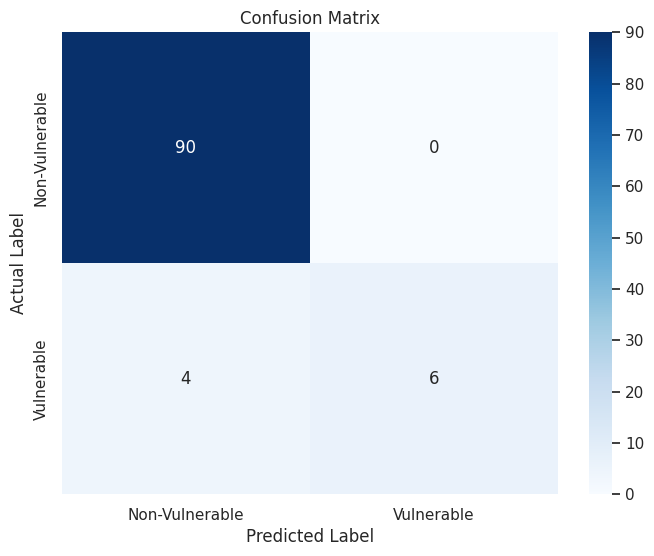


Evaluation Interpretation:
True Negatives (TN): 90 - Correctly predicted non-vulnerable.
False Positives (FP): 0 - Incorrectly predicted vulnerable (False Alarm).
False Negatives (FN): 4 - Incorrectly predicted non-vulnerable (Critical Miss!).
True Positives (TP): 6 - Correctly predicted vulnerable.


In [10]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the classification report
# This shows precision, recall, and f1-score for each class.
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Vulnerable', 'Vulnerable'], yticklabels=['Non-Vulnerable', 'Vulnerable'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nEvaluation Interpretation:")
print(f"True Negatives (TN): {cm[0][0]} - Correctly predicted non-vulnerable.")
print(f"False Positives (FP): {cm[0][1]} - Incorrectly predicted vulnerable (False Alarm).")
print(f"False Negatives (FN): {cm[1][0]} - Incorrectly predicted non-vulnerable (Critical Miss!).")
print(f"True Positives (TP): {cm[1][1]} - Correctly predicted vulnerable.")

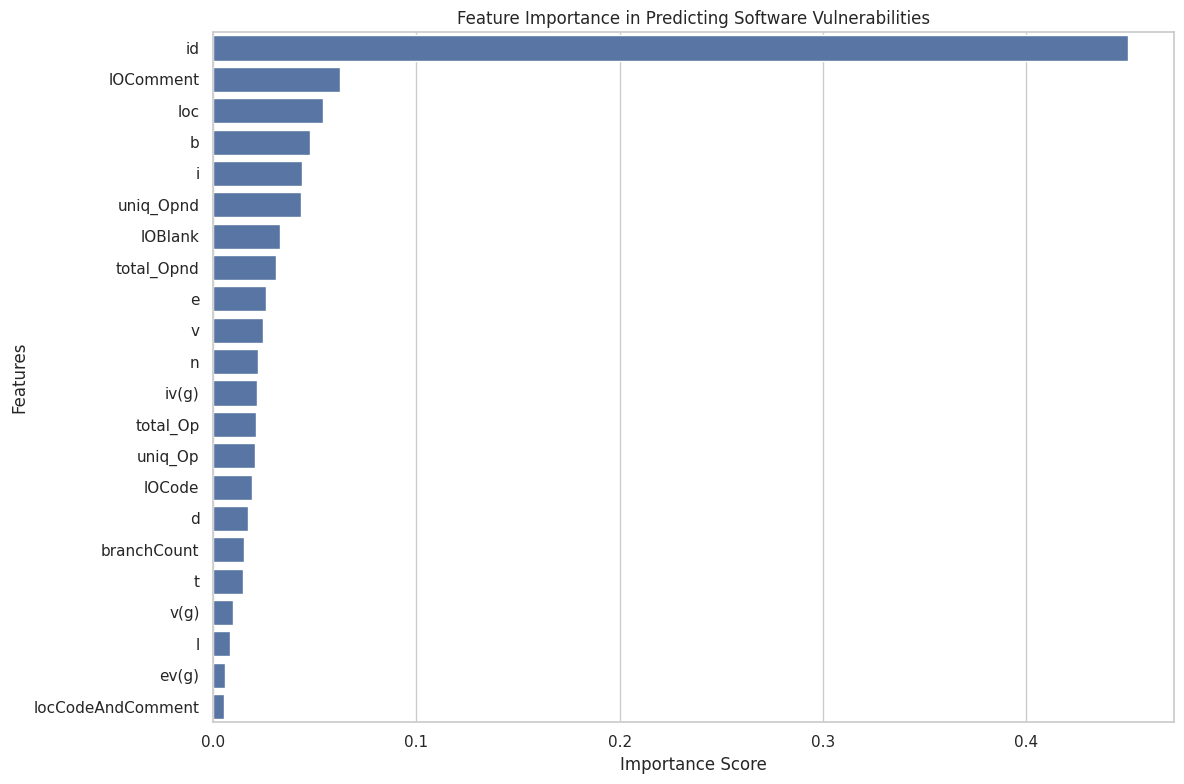


Top 5 Most Important Features:
      feature  importance
0          id    0.450061
14  lOComment    0.062555
1         loc    0.054280
11          b    0.047814
9           i    0.043821


In [11]:
# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance in Predicting Software Vulnerabilities')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance_df.head())

In [12]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'vulnerability_model.joblib')

# CRUCIAL: Save the scaler object as well.
# New data MUST be scaled in the exact same way as the training data.
joblib.dump(scaler, 'scaler.joblib')

print("Model and Scaler have been saved to files!")
print("You can find 'vulnerability_model.joblib' and 'scaler.joblib' in your Colab files.")

Model and Scaler have been saved to files!
You can find 'vulnerability_model.joblib' and 'scaler.joblib' in your Colab files.


In [13]:
!pip install radon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.0 MB/s eta 0:00:00


In [14]:
from radon.visitors import ComplexityVisitor
from radon.metrics import h_visit
from radon.raw import analyze

# Let's imagine we have a Python file named 'my_test_code.py'
# We will create it here for demonstration
sample_code = """
def complex_function(a, b, c):
    if a > b:
        if b > c:
            return 1
        else:
            return 2
    elif b > a and c > b:
        return 3
    else:
        for i in range(a):
            print(i)
        return 4
"""

with open("my_test_code.py", "w") as f:
    f.write(sample_code)

# Now, let's analyze this file with radon
with open("my_test_code.py", "r") as f:
    code_content = f.read()

# 1. Get Cyclomatic Complexity
v = ComplexityVisitor.from_code(code_content)
cyclomatic_complexity = v.functions[0].complexity # Gets complexity of the first function

# 2. Get Lines of Code metrics
raw_analysis = analyze(code_content)
lines_of_code = raw_analysis.loc
logical_lines_of_code = raw_analysis.lloc
comments = raw_analysis.comments

print(f"Cyclomatic Complexity (v(g)): {cyclomatic_complexity}")
print(f"Lines of Code (loc): {lines_of_code}")
print(f"Logical Lines of Code (lloc): {logical_lines_of_code}")

Cyclomatic Complexity (v(g)): 6
Lines of Code (loc): 13
Logical Lines of Code (lloc): 12


In [20]:
import pandas as pd
import joblib
from radon.visitors import ComplexityVisitor
from radon.metrics import h_visit
from radon.raw import analyze

# --- The CORRECTED Prediction Function ---

def predict_vulnerability(file_path):
    """
    Analyzes a single Python code file and predicts if it's vulnerable.
    """
    print(f"--- Analyzing file: {file_path} ---")

    # Step A: Load our pre-trained model and scaler
    try:
        model = joblib.load('vulnerability_model.joblib')
        scaler = joblib.load('scaler.joblib')
    except FileNotFoundError:
        return "Error: Model or scaler files not found. Please run the training script first."

    # Step B: Read and analyze the new code file
    try:
        with open(file_path, "r") as f:
            code = f.read()
    except FileNotFoundError:
        return f"Error: The file '{file_path}' was not found."

    # Step C: Extract metrics using radon
    try:
        v = ComplexityVisitor.from_code(code)
        avg_complexity = sum(f.complexity for f in v.functions) / len(v.functions) if v.functions else 0
        raw = analyze(code)
        halstead = h_visit(code).total
    except Exception as e:
        return f"Error analyzing code: {e}"

    # Step D: Create a feature vector that EXACTLY MATCHES the training data

    # --- THIS IS THE CORRECTED PART ---
    # The list now matches the columns your model was trained on.
    feature_columns = [
        'id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
        'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
        'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'
    ]

    # Create a dictionary to hold our new features, initialized to zero
    new_features = {col: 0 for col in feature_columns}

    # Fill in the values we were able to calculate
    new_features['loc'] = raw.loc
    new_features['v(g)'] = avg_complexity
    new_features['lOCode'] = raw.lloc
    new_features['lOComment'] = raw.comments
    new_features['lOBlank'] = raw.blank
    new_features['uniq_Op'] = halstead.h1
    new_features['uniq_Opnd'] = halstead.h2
    new_features['total_Op'] = halstead.N1
    new_features['total_Opnd'] = halstead.N2
    new_features['branchCount'] = avg_complexity
    # The other features like 'id', 'ev(g)', 'iv(g)', etc., will remain 0, which is a safe default.

    # Convert the dictionary to a pandas DataFrame
    new_data_df = pd.DataFrame([new_features], columns=feature_columns)

    print("\nExtracted Metrics (Corrected Columns):")
    print(new_data_df)

    # Step E: Scale the new data using the SAME scaler
    scaled_new_data = scaler.transform(new_data_df)

    # Step F: Make the prediction
    prediction = model.predict(scaled_new_data)
    prediction_proba = model.predict_proba(scaled_new_data)

    # Step G: Return a human-readable result
    if prediction[0] == 1:
        return f"\n---> Prediction: VULNERABLE (Confidence: {prediction_proba[0][1]*100:.2f}%)"
    else:
        return f"\n---> Prediction: NOT VULNERABLE (Confidence: {prediction_proba[0][0]*100:.2f}%)"

In [16]:
safe_code_content = """
def add(x, y):
    \"\"\"A simple function to add two numbers.\"\"\"
    return x + y

result = add(5, 10)
"""
with open("safe_code.py", "w") as f:
    f.write(safe_code_content)

In [22]:
# Create a new, "hyper-risky" code file to test the model's limits.
hyper_risky_code_content = """
def process_data_in_extreme_detail(data, user_type, config, mode, threshold):
    # This function is intentionally hyper-complex to trigger the model.
    # Its only purpose is to get a high complexity score.

    count = 0
    if user_type == 'ADMIN' and mode != 'safe':
        # Deeply nested logic to inflate v(g)
        for i in range(len(data)):
            try:
                if (data[i] > threshold and i % 2 == 0) or (data[i] < -threshold and i % 3 == 0):
                    if config['level'] > 5 and config['active'] is True:
                        count += (data[i] * 2) // 3
                    elif config['level'] > 2:
                        count -= data[i]
                    else:
                        pass
                elif data[i] == 0:
                    count = 0
                else:
                    count -= 1
            except IndexError:
                print("An error occurred")
                return None
    elif user_type == 'GUEST':
        while count < 100:
            count += 1
            if count == 50:
                break
    else:
        # Using a wide variety of operators
        temp = (threshold + 100) / 2 * 5 - 1
        is_valid = (temp is not None) and (temp > 0)
        if not is_valid:
            return -1

    final_result = count ** 2
    return final_result
"""

with open("hyper_risky_code.py", "w") as f:
    f.write(hyper_risky_code_content)

print("File 'hyper_risky_code.py' has been created.")

File 'hyper_risky_code.py' has been created.


In [21]:
result_safe = predict_vulnerability('safe_code.py')
print(result_safe)

print("\n" + "="*50 + "\n")

result_risky = predict_vulnerability('risky_code.py')
print(result_risky)

--- Analyzing file: safe_code.py ---

Extracted Metrics (Corrected Columns):
   id  loc  v(g)  ev(g)  iv(g)  n  v  l  d  i  ...  t  lOCode  lOComment  \
0   0    6   1.0      0      0  0  0  0  0  0  ...  0       4          0   

   lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  total_Op  total_Opnd  \
0        2                  0        1          2         1           2   

   branchCount  
0          1.0  

[1 rows x 22 columns]

---> Prediction: NOT VULNERABLE (Confidence: 93.00%)


--- Analyzing file: risky_code.py ---

Extracted Metrics (Corrected Columns):
   id  loc  v(g)  ev(g)  iv(g)  n  v  l  d  i  ...  t  lOCode  lOComment  \
0   0   20   9.0      0      0  0  0  0  0  0  ...  0      18          1   

   lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  total_Op  total_Opnd  \
0        1                  0        5         17         9          18   

   branchCount  
0          9.0  

[1 rows x 22 columns]

---> Prediction: NOT VULNERABLE (Confidence: 89.00%)


In [27]:
# Test the new, hyper-risky code
result_hyper_risky = predict_vulnerability('hyper_risky_code.py')
print(result_hyper_risky)

--- Analyzing file: hyper_risky_code.py ---

Extracted Metrics (Corrected Columns):
   id  loc  v(g)  ev(g)  iv(g)  n  v  l  d  i  ...  t  lOCode  lOComment  \
0   0   38  18.0      0      0  0  0  0  0  0  ...  0      31          4   

   lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  total_Op  total_Opnd  \
0        3                  0       17         46        37          71   

   branchCount  
0         18.0  

[1 rows x 22 columns]

---> Prediction: NOT VULNERABLE (Confidence: 88.00%)
